In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [44]:
def graphing_training_validation(history):
    acc = history['train_acc']
    val_acc = history['test_acc']
    #loss = history['loss']
    #val_loss = history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.ylabel('accuracy') 
    plt.xlabel('epoch')
    plt.legend()
    plt.figure()
    """
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.ylabel('loss') 
    plt.xlabel('epoch')
    plt.legend()
    plt.show()
    """

# Loading of the data

Start by loading the data of the metadata and the two extracted features sets

In [24]:
metadata = pd.read_csv("processed_metadata.csv")
metadata.head()

,path,segment,mod,label,samplingrate,ms,samples
0,./Labelled/Bleatings/evt_000_000_000681_210415...,0,0,Bleatings,16000,3000.0,processed_samples/0.wav
1,./Labelled/Bleatings/evt_000_000_000681_210415...,1,0,Bleatings,16000,3000.0,processed_samples/1.wav
2,./Labelled/Bleatings/evt_000_000_000681_210415...,2,0,Bleatings,16000,3000.0,processed_samples/2.wav
3,./Labelled/Bleatings/evt_000_000_000681_210415...,3,0,Bleatings,16000,3000.0,processed_samples/3.wav
4,./Labelled/Bleatings/evt_000_000_000682_210415...,0,0,Bleatings,16000,3000.0,processed_samples/4.wav


In [26]:
d1 = pd.read_csv("mfcc_deltamfcc_stat.csv")
np.shape(d1)

(6944, 130)

In [28]:
d2 = pd.read_csv("mfcc_deltamfcc_entire.csv")
np.shape(d2)

(6944, 2444)

Preapare the data for SVC model by extracting the labels and scaling the features sets

In [29]:
# Transforming non numerical labels into numerical labels
labels = metadata["label"]
encoder = LabelEncoder()

# encoding train labels
y = encoder.fit_transform(labels)

In [30]:
# scale the features
scaler = StandardScaler()

x1 = scaler.fit_transform(d1)
x2 = scaler.fit_transform(d2)

# 10-fold Cross Validation

Start evaluating the two features set using a SVC model setup with a rbf kernel and C=1 using 10 fold cv. The choosen metrics are accuracy and auroc

In [31]:
# set up cross validation procedure
scoring = {'acc': 'accuracy',
           'auroc': 'roc_auc_ovr'}

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)

In [32]:
scores1 = cross_validate(SVC(probability=True), x1, y, cv=kfold.split(x1, y), scoring=scoring, return_train_score=True)

In [33]:
scores1

{'fit_time': array([10.41704822,  9.51529884,  9.65084982,  9.34900594,  9.65346289,
         9.20398021,  9.36299992,  9.33799887,  9.61388803,  9.27399659]),
 'score_time': array([0.77164173, 0.69699907, 0.72499704, 0.72499466, 0.68899941,
        0.68799829, 0.72200012, 1.0601027 , 0.69399595, 1.04790545]),
 'test_acc': array([0.89208633, 0.88776978, 0.88776978, 0.88057554, 0.86743516,
        0.87608069, 0.86455331, 0.88472622, 0.86887608, 0.86599424]),
 'train_acc': array([0.9262282 , 0.92638822, 0.92510802, 0.92318771, 0.92544   ,
        0.92576   , 0.92752   , 0.92768   , 0.92832   , 0.9256    ]),
 'test_auroc': array([0.96792376, 0.97495334, 0.96887987, 0.97201272, 0.9631459 ,
        0.95873715, 0.96332047, 0.96711644, 0.96355845, 0.9637989 ]),
 'train_auroc': array([0.98433172, 0.98418808, 0.9844021 , 0.98436601, 0.98498968,
        0.98494076, 0.9847075 , 0.98488268, 0.98489199, 0.98470438])}

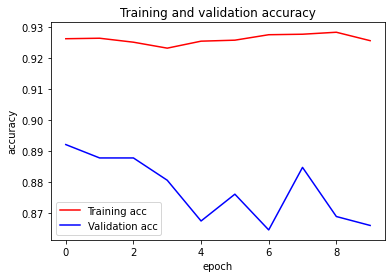

<Figure size 432x288 with 0 Axes>

In [45]:
graphing_training_validation(scores1)

In [36]:
scores1['test_acc'].mean()

0.8775867144900793

In [38]:
scores1['test_auroc'].mean()

0.9663447012740838

In [34]:
scores2 = cross_validate(SVC(probability=True), x2, y, cv=kfold.split(x2, y), scoring=scoring, return_train_score=True)

In [35]:
scores2

{'fit_time': array([167.84348154, 168.22680545, 165.05299997, 165.73700023,
        166.40624142, 166.08102202, 168.23821664, 167.11704636,
        167.2579782 , 166.33899999]),
 'score_time': array([11.92600656, 11.86299729, 11.80499983, 12.12765527, 11.80400491,
        11.88399911, 11.83200097, 11.88999987, 11.95600104, 11.83699918]),
 'test_acc': array([0.8705036 , 0.8705036 , 0.85035971, 0.83309353, 0.86887608,
        0.85302594, 0.84582133, 0.87175793, 0.84582133, 0.84582133]),
 'train_acc': array([0.9599936 , 0.96159386, 0.96047368, 0.95967355, 0.96208   ,
        0.95984   , 0.9584    , 0.96064   , 0.96368   , 0.96096   ]),
 'test_auroc': array([0.96371725, 0.965249  , 0.95733096, 0.95234804, 0.96396986,
        0.95830193, 0.95688271, 0.96137556, 0.95531403, 0.95844248]),
 'train_auroc': array([0.99607556, 0.99611842, 0.99604362, 0.99597444, 0.99624161,
        0.99605521, 0.9959127 , 0.99595281, 0.99643462, 0.99589219])}

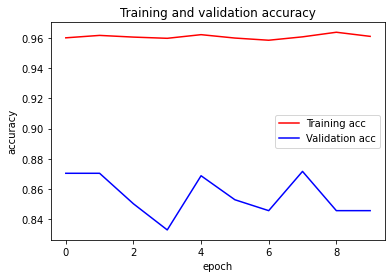

<Figure size 432x288 with 0 Axes>

In [46]:
graphing_training_validation(scores2)

In [37]:
scores2['test_acc'].mean()

0.8555584350963035

In [39]:
scores2['test_auroc'].mean()

0.9592931819079095

# Old

In [32]:
# get train and test data
# X1_train, X1_test, y1_train, y1_test = train_test_split(x, y, test_size=0.2)

In [33]:
m = SVC()

In [ ]:
m.fit(X1_train, y1_train)

In [21]:
Y_pred = m.predict(X1_test)

In [22]:
Y_pred

array([0, 2, 0, ..., 2, 2, 1])

In [23]:
list(encoder.inverse_transform(Y_pred1))

['Bleatings',
 'Others',
 'Bleatings',
 'Others',
 'Others',
 'Bleatings',
 'ContactCalls',
 'Bleatings',
 'Others',
 'Others',
 'Others',
 'ContactCalls',
 'Bleatings',
 'ContactCalls',
 'Others',
 'Bleatings',
 'ContactCalls',
 'Bleatings',
 'Others',
 'ContactCalls',
 'Bleatings',
 'Others',
 'ContactCalls',
 'Others',
 'Bleatings',
 'Bleatings',
 'Others',
 'Bleatings',
 'Bleatings',
 'ContactCalls',
 'Bleatings',
 'Bleatings',
 'Others',
 'Others',
 'ContactCalls',
 'ContactCalls',
 'Others',
 'Bleatings',
 'Others',
 'Others',
 'Others',
 'Others',
 'Bleatings',
 'ContactCalls',
 'ContactCalls',
 'Others',
 'Bleatings',
 'ContactCalls',
 'ContactCalls',
 'Others',
 'Others',
 'ContactCalls',
 'ContactCalls',
 'ContactCalls',
 'ContactCalls',
 'ContactCalls',
 'Others',
 'ContactCalls',
 'Bleatings',
 'Others',
 'ContactCalls',
 'Others',
 'Bleatings',
 'ContactCalls',
 'Others',
 'Others',
 'Others',
 'ContactCalls',
 'Others',
 'ContactCalls',
 'Bleatings',
 'ContactCalls',
 'Ot

# Base classifier

In [26]:
print(confusion_matrix(y1_test,Y_pred1))
print("\n")
print(classification_report(y1_test,Y_pred1))

print("Training set score for SVM: %f" % m1.score(X1_train , y1_train))
print("Testing  set score for SVM: %f" % m1.score(X1_test  , y1_test ))

m1.score

[[332 138  11]
 [ 71 344   6]
 [ 11   6 482]]


              precision    recall  f1-score   support

           0       0.80      0.69      0.74       481
           1       0.70      0.82      0.76       421
           2       0.97      0.97      0.97       499

    accuracy                           0.83      1401
   macro avg       0.82      0.82      0.82      1401
weighted avg       0.83      0.83      0.83      1401

Training set score for SVM: 0.956817
Testing  set score for SVM: 0.826552


<bound method ClassifierMixin.score of SVC()>

In [27]:
m1.score

<bound method ClassifierMixin.score of SVC()>

In [25]:
print(confusion_matrix(y2_test,Y_pred2))
print("\n")
print(classification_report(y2_test,Y_pred2))

print("Training set score for SVM: %f" % m2.score(X2_train , y2_train))
print("Testing  set score for SVM: %f" % m2.score(X2_test  , y2_test ))

m2.score

[[386  81  12]
 [ 77 361   6]
 [  5   0 473]]


              precision    recall  f1-score   support

           0       0.82      0.81      0.82       479
           1       0.82      0.81      0.81       444
           2       0.96      0.99      0.98       478

    accuracy                           0.87      1401
   macro avg       0.87      0.87      0.87      1401
weighted avg       0.87      0.87      0.87      1401

Training set score for SVM: 0.918630
Testing  set score for SVM: 0.870807


<bound method ClassifierMixin.score of SVC()>

# Grid Search

In [34]:
params_grid = [{'kernel': ['rbf'],'C': [0.1, 1, 10, 100, 1000]},
               {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}]

In [35]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X1_train, y1_train)

KeyboardInterrupt: 

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model.best_estimator_.gamma,"\n")

final_model = svm_model.best_estimator_
Y_pred = final_model.predict(X1_test)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
print(confusion_matrix(y1_test,Y_pred))
print("\n")
print(classification_report(y1_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X1_train, y1_train))
print("Testing  set score for SVM: %f" % final_model.score(X1_test, y1_test ))

svm_model.score

In [ ]:
svm_model2 = GridSearchCV(SVC(), params_grid, cv=5)
svm_model2.fit(X2_train, y2_train)

In [ ]:
# View the accuracy score
print('Best score for training data:', svm_model2.best_score_,"\n") 

# View the best parameters for the model found using grid search
print('Best C:',svm_model2.best_estimator_.C,"\n") 
print('Best Kernel:',svm_model2.best_estimator_.kernel,"\n")
print('Best Gamma:',svm_model2.best_estimator_.gamma,"\n")

final_model = svm_model2.best_estimator_
Y_pred = final_model.predict(X2_test)
Y_pred_label = list(encoder.inverse_transform(Y_pred))

In [ ]:
print(confusion_matrix(y2_test,Y_pred))
print("\n")
print(classification_report(y2_test,Y_pred))

print("Training set score for SVM: %f" % final_model.score(X2_train, y2_train))
print("Testing  set score for SVM: %f" % final_model.score(X2_test, y2_test ))

svm_model.score